In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [32]:
genera_present = pd.read_csv("../als_cfdna_samples/genera_present_binary_10.csv")
genera_counts = pd.read_csv("../als_cfdna_samples/genera_counts_10.csv")

In [33]:
genera_present.columns = genera_present.columns.str.replace(' ', '_')
genera_counts.columns = genera_counts.columns.str.replace(' ', '_')
genera_counts.columns = genera_counts.columns.str.replace('.', '_')
genera_counts.columns = genera_counts.columns.str.replace('(', '_')
genera_counts.columns = genera_counts.columns.str.replace(')', '_')
genera_present.columns = genera_counts.columns.str.replace('.', '_')
genera_present.columns = genera_counts.columns.str.replace('(', '_')
genera_present.columns = genera_counts.columns.str.replace(')', '_')

In [34]:
relative_genera_counts = genera_counts.copy()

# Sum the counts for each sample (across the rows)
row_sums = genera_counts.iloc[:, 1:].sum(axis=1)  # Exclude the 'sample_num' column

# Divide each genera count by the total count for that sample
relative_genera_counts.iloc[:, 1:] = genera_counts.iloc[:, 1:].div(row_sums, axis=0)

In [35]:
relative_genera_counts

,sample_num,Thiothrix,Stigmatella,Haliangium,Marinobacterium,Aromatoleum,Changpingibacter,Sulfuricella,Solitalea,Polaribacter,...,Caulobacter,Teredinibacter,Rheinheimera,Phreatobacter,Algoriphagus,Sphingobacterium,Olsenella,Salmonella,Lactococcus,Bacillus
0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.004318,0.0,0.0,0.0,0.0,0.0,0.0,0.003985
3,4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.015172
4,5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.015202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
188,189,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.006544,0.0,0.0,0.0,0.0,0.0,0.0,0.025767
189,190,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
190,191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [36]:
ucsf_present = genera_present.iloc[:96]
uq_present = genera_present.iloc[96:192]

In [37]:
sums = {}
for genera in genera_present.columns:
    if genera == 'sample_num':
        continue
    sums[genera] = genera_present[genera].sum()
most_common_genera = dict(sorted(sums.items(), key=lambda item: item[1], reverse=True))

In [38]:
most_common_genera

{'Streptomyces': 191,
 'Pseudomonas': 188,
 'Paenibacillus': 187,
 'Vibrio': 186,
 'Mesorhizobium': 185,
 'Phaeobacter': 185,
 'Pseudoalteromonas': 183,
 'Rhizobium': 178,
 'Thermosulfurimonas': 178,
 'Shewanella': 167,
 'Mycolicibacterium': 167,
 'Azospirillum': 166,
 'Kocuria': 165,
 'Bifidobacterium': 157,
 'Corynebacterium': 156,
 'Bradyrhizobium': 155,
 'Cupriavidus': 144,
 'Bacillus': 142,
 'Pseudonocardia': 139,
 'Clostridium': 136,
 'Sphingomonas': 132,
 'Mycobacterium': 124,
 'Acinetobacter': 122,
 'Spiroplasma': 122,
 'Arthrobacter': 114,
 'Xanthomonas': 114,
 'Jonesia': 114,
 'Mycobacteroides': 110,
 'Hymenobacter': 108,
 'Flavobacterium': 106,
 'Rheinheimera': 105,
 'Dickeya': 104,
 'Anaerocolumna': 103,
 'Microbacterium': 100,
 'Nocardia': 100,
 'Halomonas': 92,
 'Rhodococcus': 91,
 'Burkholderia': 87,
 'Citrobacter': 82,
 'Paraburkholderia': 80,
 'Enterobacter': 73,
 'Aeromonas': 67,
 'Caldimonas': 63,
 'Amycolatopsis': 62,
 'Hylemonella': 61,
 'Solidesulfovibrio': 59,
 '

In [39]:
sums = {}
for genera in genera_counts.columns:
    if genera == 'sample_num':
        continue
    sums[genera] = genera_counts[genera].sum()

In [40]:
sum(sums.values())/len(sums) #average count across all genera

2410.8475073313784

In [41]:
sorted_sums = dict(sorted(sums.items(), key=lambda item: item[1], reverse=True))

In [42]:
sorted_sums

{'Phaeobacter': 122896,
 'Streptomyces': 73822,
 'Pseudomonas': 57466,
 'Azospirillum': 57288,
 'Mesorhizobium': 40769,
 'Paenibacillus': 37762,
 'Thermosulfurimonas': 36277,
 'Pseudoalteromonas': 30917,
 'Xanthomonas': 24517,
 'Vibrio': 23585,
 'Bifidobacterium': 21379,
 'Salmonella': 17850,
 'Mycolicibacterium': 15320,
 'Spiroplasma': 13951,
 'Cupriavidus': 11010,
 'Kocuria': 10875,
 'Pseudonocardia': 10587,
 'Rhizobium': 9769,
 'Corynebacterium': 9439,
 'Bacillus': 8886,
 'Dickeya': 8101,
 'Bradyrhizobium': 7817,
 'Shewanella': 6450,
 'Mycobacterium': 6140,
 'Acinetobacter': 5541,
 'Anaerocolumna': 4929,
 'Clostridium': 4699,
 'Hymenobacter': 4583,
 'Sphingomonas': 4314,
 'Mycobacteroides': 4060,
 'Caldimonas': 3944,
 'Burkholderia': 3828,
 'Arthrobacter': 3726,
 'Flavobacterium': 3661,
 'Nocardia': 3388,
 'Jonesia': 3295,
 'Microbacterium': 3101,
 'Rhodococcus': 3078,
 'Solidesulfovibrio': 2980,
 'Halomonas': 2606,
 'Citrobacter': 2496,
 'Enterobacter': 2463,
 'Escherichia': 2374,


<Axes: >

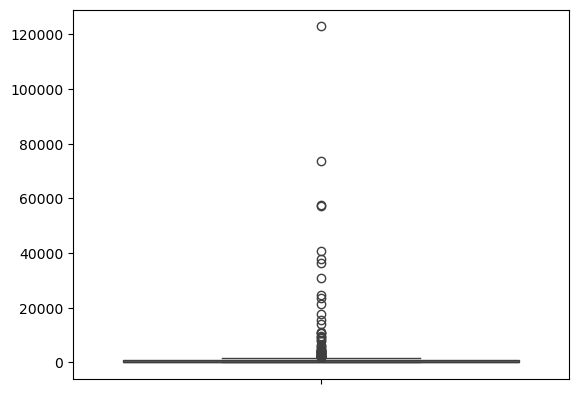

In [43]:
sns.boxplot(data=sums)

In [44]:
#median_count = statistics.median(sums)

In [45]:
#median_count

In [46]:
columns_over_5 = {}
for genera in genera_counts.columns:
    if genera == 'sample_num':
        continue
    if ucsf_present[genera].sum() > 5 and uq_present[genera].sum() > 5:
        columns_over_5[genera] = genera_counts[genera].sum()

In [47]:
len(columns_over_5)

86

In [48]:
over_5_sorted = dict(sorted(columns_over_5.items(), key=lambda item: item[1], reverse=True))

In [49]:
over_5_sorted

{'Phaeobacter': 122896,
 'Streptomyces': 73822,
 'Pseudomonas': 57466,
 'Azospirillum': 57288,
 'Mesorhizobium': 40769,
 'Paenibacillus': 37762,
 'Thermosulfurimonas': 36277,
 'Pseudoalteromonas': 30917,
 'Xanthomonas': 24517,
 'Vibrio': 23585,
 'Bifidobacterium': 21379,
 'Salmonella': 17850,
 'Mycolicibacterium': 15320,
 'Spiroplasma': 13951,
 'Cupriavidus': 11010,
 'Kocuria': 10875,
 'Pseudonocardia': 10587,
 'Rhizobium': 9769,
 'Corynebacterium': 9439,
 'Bacillus': 8886,
 'Dickeya': 8101,
 'Bradyrhizobium': 7817,
 'Shewanella': 6450,
 'Mycobacterium': 6140,
 'Acinetobacter': 5541,
 'Anaerocolumna': 4929,
 'Clostridium': 4699,
 'Hymenobacter': 4583,
 'Sphingomonas': 4314,
 'Mycobacteroides': 4060,
 'Caldimonas': 3944,
 'Burkholderia': 3828,
 'Arthrobacter': 3726,
 'Flavobacterium': 3661,
 'Nocardia': 3388,
 'Jonesia': 3295,
 'Microbacterium': 3101,
 'Rhodococcus': 3078,
 'Solidesulfovibrio': 2980,
 'Halomonas': 2606,
 'Citrobacter': 2496,
 'Enterobacter': 2463,
 'Amycolatopsis': 2142

In [50]:
clinical = pd.read_csv("../als_cfdna_samples/combined_metadata_redone.csv")

In [51]:
for genera in over_5_sorted:
    clinical[genera] = relative_genera_counts[genera]

In [52]:
clinical = clinical[clinical['sample_type'] != 'bsctrl']

In [53]:
clinical["type_binary"] = clinical["sample_type"].replace({"ctrl":0, "als":1})
clinical["sex_binary"] = clinical["sex"].replace({"Male":0, "Female":1})
clinical["cohort_binary"] = clinical["cohort"].replace({"ucsf":0, "uq":1})
clinical['ethnicity_binary'] = clinical['ethnicity'].apply(lambda x: 0 if x == 'White' else 1)

In [54]:
clinical

,sample_num,collection_ID,sample_type,sample_type_3,als_type,cohort,als_frs,als_frs_slope,age,age_at_onset,...,Psychrobacter,Xanthobacter,Sphingobium,Pedobacter,Sphingobacterium,Pectobacterium,type_binary,sex_binary,cohort_binary,ethnicity_binary
0,1,NaN,ctrl,ctrl,NaN,ucsf,NaN,NaN,74.0,NaN,...,0.008612,0.0,0.000000,0.0,0.0,0.0,0,0,0,0
1,2,NaN,ctrl,ctrl,NaN,ucsf,NaN,NaN,57.0,NaN,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0,1,0,0
2,3,NaN,ctrl,ctrl,NaN,ucsf,NaN,NaN,47.0,NaN,...,0.000000,0.0,0.005314,0.0,0.0,0.0,0,0,0,0
3,4,NaN,ctrl,ctrl,NaN,ucsf,NaN,NaN,55.0,NaN,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0,0,0,0
4,5,NaN,ctrl,ctrl,NaN,ucsf,NaN,NaN,80.0,NaN,...,0.000000,0.0,0.008817,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,4629546_1012500,ctrl,ctrl,NaN,uq,NaN,NaN,70.0,NaN,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0,0,1,0
188,189,9795053_11022889,ctrl,ond,NaN,uq,NaN,NaN,69.0,NaN,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0,0,1,0
189,190,8941124_11024590,ctrl,ond,NaN,uq,NaN,NaN,65.0,NaN,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0,1,1,0
190,191,2234555_11025967,ctrl,ond,NaN,uq,NaN,NaN,81.0,NaN,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0,0,1,0


In [55]:
pv = {}

#for each genera present more than 5 times in both cohorts
for genera in over_5_sorted:
    #count how many samples they are present in
    
    #get a p-vaue for als vs control and add it to dict
    mod = smf.logit(formula=f"type_binary ~ {genera} + cohort_binary + age + sex_binary + ethnicity_binary", data=clinical).fit()
    p = mod.pvalues[genera]
    pv[genera] = p
#sort by p-value

Optimization terminated successfully.
         Current function value: 0.662310
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662916
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660045
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.646008
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663167
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.661027
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.661915
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.658476
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662594
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660767
  

In [56]:
pv_sorted = dict(sorted(pv.items(), key=lambda item: item[1]))

In [57]:
pv_sorted

{'Azospirillum': 0.014347467296898364,
 'Bacillus': 0.01745276887124599,
 'Actinomyces': 0.028802667383610262,
 'Loigolactobacillus': 0.0441888826200803,
 'Dickeya': 0.06887178065511146,
 'Enterobacter': 0.07750758114179403,
 'Anaerocolumna': 0.07950641017967335,
 'Pseudonocardia': 0.08100913173241585,
 'Chryseobacterium': 0.08452206271226001,
 'Jonesia': 0.0889880820221104,
 'Glutamicibacter': 0.11035457444046713,
 'Caldimonas': 0.12970777771530323,
 'Mycolicibacterium': 0.13278378809507604,
 'Paracholeplasma': 0.1355442584178956,
 'Achromobacter': 0.18250568524567978,
 'Nocardioides': 0.19349930192904197,
 'Pseudoalteromonas': 0.20314986392417633,
 'Collinsella': 0.20985753724795353,
 'Synechococcus': 0.2136904869560966,
 'Psychrobacter': 0.21799784554456147,
 'Mycobacterium': 0.24584165675914382,
 'Salmonella': 0.2460584481791258,
 'Flavobacterium': 0.2545786619350825,
 'Spiroplasma': 0.25589623909734516,
 'Paraburkholderia': 0.2567817350033823,
 'Pantoea': 0.2771343757657425,
 'Pse

In [58]:
significant_genera = [genus for genus, p_value in pv_sorted.items() if p_value < 0.05]

In [59]:
significant_genera

['Azospirillum', 'Bacillus', 'Actinomyces', 'Loigolactobacillus']

In [60]:
columns_to_plot = ['sample_num', 'sample_type'] + significant_genera  # Include 'sample_num' and 'sample_type' as necessary
df_selected = clinical[columns_to_plot]

# Melt the dataframe to long format for Seaborn boxplot
df_melted = df_selected.melt(id_vars=['sample_num', 'sample_type'], 
                             value_vars=significant_genera, 
                             var_name='Genus', 
                             value_name='Abundance')

In [62]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_melted, x='Genus', y='Abundance', hue='cohort')

# Add p-value annotations
y_max = df_melted['Abundance'].max()  # Find the max value in the data for proper annotation placement
for genus in significant_genera:
    p_value = pv_sorted[genus]
    # Get the x position of the genus
    x_position = df_melted['Genus'].unique().tolist().index(genus)
    # Adjust the y position (a little above the max abundance value for the plot)
    y_position = 0.3  # Adjust to avoid overlapping with the boxplot
    # Annotate the p-value
    #ax.text(x=x_position, y=y_position, s=f"p={p_value:.3f}", ha='center', color='black')

# Customize plot
plt.xticks(rotation=90)
plt.ylabel('Relative abundance')
plt.title('Significant genera by sample type')
plt.show()

ValueError: Could not interpret value `cohort` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>